## A Man-in-the Middle Attack against Object Detection Systems
Experiments for the paper: https://arxiv.org/abs/2208.07174

In [251]:
import os
import matplotlib.pyplot as plt

In [252]:
from tensorflow.python.summary.summary_iterator import summary_iterator

## 1. Get log files

In [253]:
def get_tfb_file(directory):
    file_list = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = subdir + os.sep + file
            file_list.append(filepath)
    
    return file_list

In [254]:
log_pcb_zero_init_file = get_tfb_file("logs/pcb/zero_init")

In [255]:
log_pcb_uniform_init_file = get_tfb_file("logs/pcb/uniform_init")

## 2. Get the data

In [256]:
def get_tfb_data(files, tag):
    data_list = []
    for f in files:
        data = []
        for e in summary_iterator(f):
            for v in e.summary.value:
                if v.tag == tag:
                    data.append(v.simple_value)
        data_list.append(data)
    
    return data_list

## 3. Initialization

### Number of Boxes

In [257]:
pcb_zero_init_boxes = get_tfb_data(log_pcb_zero_init_file, "boxes")
pcb_uniform_init_boxes = get_tfb_data(log_pcb_uniform_init_file, "boxes")

### Mean Confidence Increace

In [262]:
pcb_zero_init_conf = get_tfb_data(log_pcb_zero_init_file, "mean confidence increase")
pcb_uniform_init_conf = get_tfb_data(log_pcb_uniform_init_file, "mean confidence increase")

### Boxes Variation

In [263]:
pcb_zero_init_boxes_var = get_tfb_data(log_pcb_zero_init_file, "box variation")
pcb_uniform_init_boxes_var = get_tfb_data(log_pcb_uniform_init_file, "box variation")

### Plot the data

In [297]:
MAX_DATA = 300

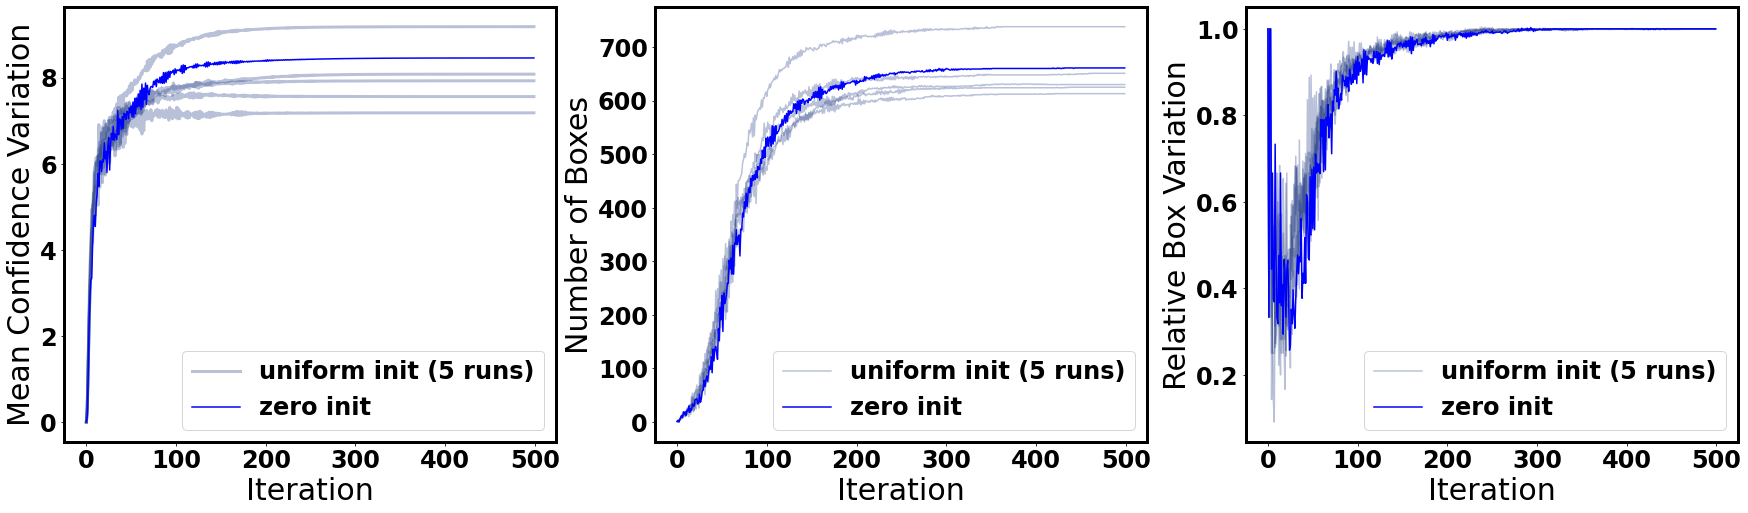

In [375]:
parameters = {'axes.labelsize': 30,
              'axes.linewidth': 3,
              'figure.figsize': (30, 8),
              'font.size': 24,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)


f, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)

f.set_figheight(8)
f.set_figwidth(30)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Mean Confidence Variation')

for idx, d in enumerate(pcb_uniform_init_conf):
    if idx == 0:
        ax1.plot(d[:MAX_DATA], c = (0.1, 0.2, 0.5, 0.3), linewidth = 3, label = 'uniform init (5 runs)')
    else:
        ax1.plot(d[:MAX_DATA], c = (0.1, 0.2, 0.5, 0.3), linewidth = 3)

ax1.plot(pcb_zero_init_conf[0][:MAX_DATA], 'b-', label='zero init')

ax1.legend(loc="lower right")


# plt.subplot(1, 3, 2)

ax2.set_xlabel('Iteration')

ax2.set_ylabel('Number of Boxes')

for idx, box in enumerate(pcb_uniform_init_boxes):
    if idx == 0:
        ax2.plot(box[:MAX_DATA], c = (0.1, 0.2, 0.5, 0.3), label = 'uniform init (5 runs)')
    else:
        ax2.plot(box[:MAX_DATA], c = (0.1, 0.2, 0.5, 0.3))

ax2.plot(pcb_zero_init_boxes[0][:MAX_DATA], 'b-', label='zero init')

ax2.legend(loc="lower right")


# plt.subplot(1, 3, 3)

ax3.set_xlabel('Iteration')

ax3.set_ylabel('Relative Box Variation')

for idx, d in enumerate(pcb_uniform_init_boxes_var):
    if idx == 0:
        ax3.plot(d[:MAX_DATA], c = (0.1, 0.2, 0.5, 0.3), label = 'uniform init (5 runs)')
    else:
        ax3.plot(d[:MAX_DATA], c = (0.1, 0.2, 0.5, 0.3))

ax3.plot(pcb_zero_init_boxes_var[0][:MAX_DATA], 'b-', label='zero init')

ax3.legend(loc="lower right")

plt.show()

In [376]:
f.savefig("init", bbox_inches='tight', pad_inches=0)

## 4. Learning Rate Decay

In [324]:
log_pcb_decay_file = get_tfb_file("logs/pcb/decay/")

In [327]:
log_pcb_decay_file = [
 'logs/pcb/decay/1.00/20220812-114158/events.out.tfevents.1660300927.pop-os',
 'logs/pcb/decay/0.99/20220812-113414/events.out.tfevents.1660300463.pop-os',
 'logs/pcb/decay/0.97/20220812-113917/events.out.tfevents.1660300766.pop-os',
 'logs/pcb/decay/0.95/20220812-113040/events.out.tfevents.1660300249.pop-os',
 'logs/pcb/decay/0.9/20220812-113648/events.out.tfevents.1660300617.pop-os'
]

In [328]:
pcb_decay_boxes = get_tfb_data(log_pcb_decay_file, "boxes")
pcb_decay_conf = get_tfb_data(log_pcb_decay_file, "mean confidence increase")
pcb_decay_var = get_tfb_data(log_pcb_decay_file, "box variation")

In [369]:
MAX_DATA = 500
legend_labels = ["k=1.00", "k=0.99", "k=0.97", "k=0.95", "k=0.90"]

In [370]:
from cycler import cycler

In [371]:
prop_cycle

'#000000'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#1f77b4'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


In [372]:
prop_cycle = plt.rcParams['axes.prop_cycle']
my_cycler = cycler('color', ['#000000', '#ff7f0e', '#2ca02c', '#d62728', '#1f77b4', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

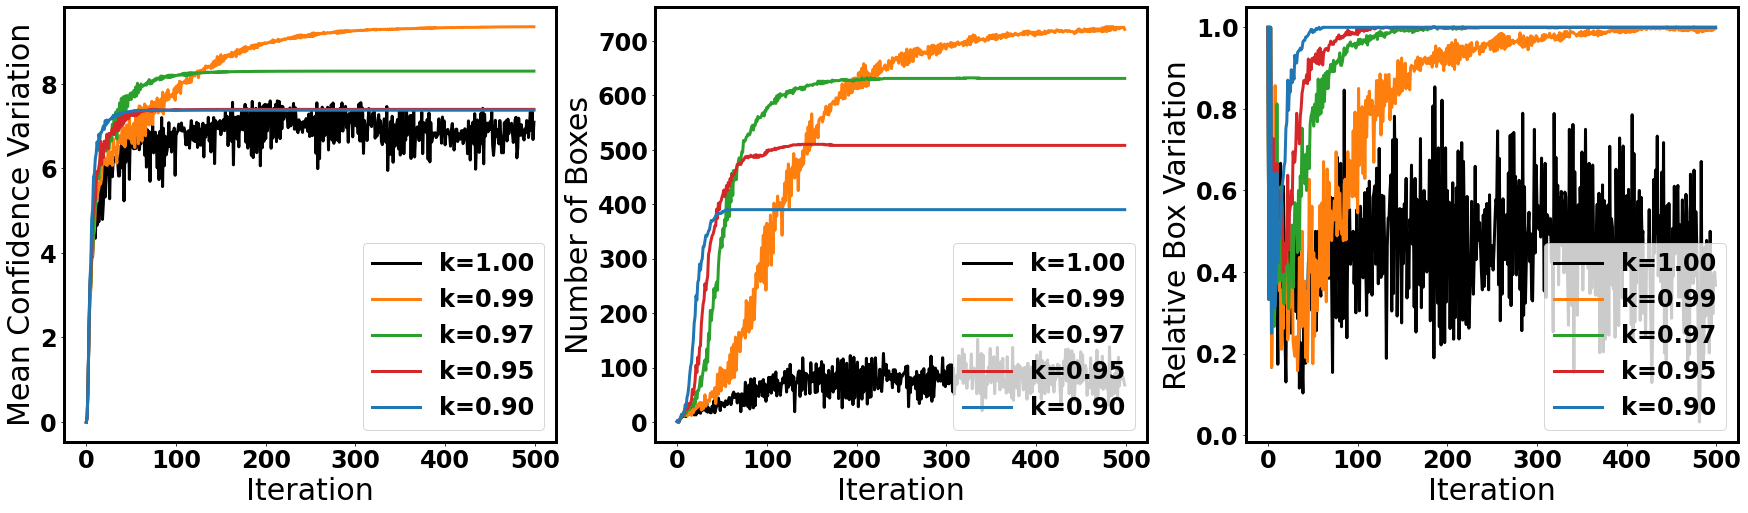

In [373]:
parameters = {'axes.labelsize': 30,
              'axes.linewidth': 3,
              'figure.figsize': (30, 10),
              'font.size': 24,
              'font.weight' : 'bold',
              'axes.prop_cycle': my_cycler
             }

plt.rcParams.update(parameters)

f, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)

f.set_figheight(8)
f.set_figwidth(30)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Mean Confidence Variation')

for idx, d in enumerate(pcb_decay_conf):
        ax1.plot(d[:MAX_DATA], linewidth = 3, label = legend_labels[idx])

ax1.legend(loc="lower right")
        
# plt.subplot(1, 3, 2)

ax2.set_xlabel('Iteration')

ax2.set_ylabel('Number of Boxes')

for idx, box in enumerate(pcb_decay_boxes):
        ax2.plot(box[:MAX_DATA], linewidth = 3, label = legend_labels[idx])

ax2.legend(loc="lower right")

# plt.subplot(1, 3, 3)

ax3.set_xlabel('Iteration')

ax3.set_ylabel('Relative Box Variation')

for idx, d in enumerate(pcb_decay_var):
    ax3.plot(d[:MAX_DATA], linewidth = 3, label=legend_labels[idx])

ax3.legend(loc="lower right")    

plt.show()

In [374]:
f.savefig("lr", bbox_inches='tight', pad_inches=0)

## 5. Adversarial Loss Functions

In [380]:
get_tfb_file("logs/pc/decay/")

['logs/pc/decay/0.99/20220813-153020/events.out.tfevents.1660401028.pop-os',
 'logs/pc/decay/0.97/20220813-153248/events.out.tfevents.1660401177.pop-os',
 'logs/pc/decay/0.90/20220813-153713/events.out.tfevents.1660401442.pop-os',
 'logs/pc/decay/1.00/20220813-152848/events.out.tfevents.1660400937.pop-os',
 'logs/pc/decay/0.95/20220813-153516/events.out.tfevents.1660401325.pop-os']

In [381]:
get_tfb_file("logs/pcb/decay/")

['logs/pcb/decay/0.99/20220812-113414/events.out.tfevents.1660300463.pop-os',
 'logs/pcb/decay/0.97/20220812-113917/events.out.tfevents.1660300766.pop-os',
 'logs/pcb/decay/0.90/20220812-113648/events.out.tfevents.1660300617.pop-os',
 'logs/pcb/decay/1.00/20220812-114158/events.out.tfevents.1660300927.pop-os',
 'logs/pcb/decay/0.95/20220812-113040/events.out.tfevents.1660300249.pop-os']

In [382]:
get_tfb_file("logs/tog/decay/")

['logs/tog/decay/0.99/20220813-151700/events.out.tfevents.1660400223.pop-os',
 'logs/tog/decay/0.97/20220813-152025/events.out.tfevents.1660400428.pop-os',
 'logs/tog/decay/0.90/20220813-152409/events.out.tfevents.1660400652.pop-os',
 'logs/tog/decay/1.00/20220813-151835/events.out.tfevents.1660400318.pop-os',
 'logs/tog/decay/0.95/20220813-152155/events.out.tfevents.1660400519.pop-os']

In [383]:
log_loss_file = ['logs/pc/decay/0.99/20220813-153020/events.out.tfevents.1660401028.pop-os',
                 'logs/pc/decay/0.90/20220813-153713/events.out.tfevents.1660401442.pop-os',
                 'logs/pcb/decay/0.99/20220812-113414/events.out.tfevents.1660300463.pop-os',
                 'logs/pcb/decay/0.90/20220812-113648/events.out.tfevents.1660300617.pop-os',
                 'logs/tog/decay/0.99/20220813-151700/events.out.tfevents.1660400223.pop-os',
                 'logs/tog/decay/0.90/20220813-152409/events.out.tfevents.1660400652.pop-os',
                ]

In [386]:
loss_function_boxes = get_tfb_data(log_loss_file, "boxes")
loss_function_conf  = get_tfb_data(log_loss_file, "mean confidence increase")
loss_function_var   = get_tfb_data(log_loss_file, "box variation")

In [398]:
MAX_DATA = 500
legend_labels = ["PC k=0.99", "PC k=0.90", "PCB k=0.99", "PCB k=0.90", "TOG k=0.99", "TOG k=0.90"]
linestyle = ["solid", "dashed", "solid", "dashed", "solid", "dashed"]

In [399]:
prop_cycle = plt.rcParams['axes.prop_cycle']
my_cycler = cycler('color', ['#000000', '#000000', '#ff7f0e', '#ff7f0e', '#1f77b4', '#1f77b4'])

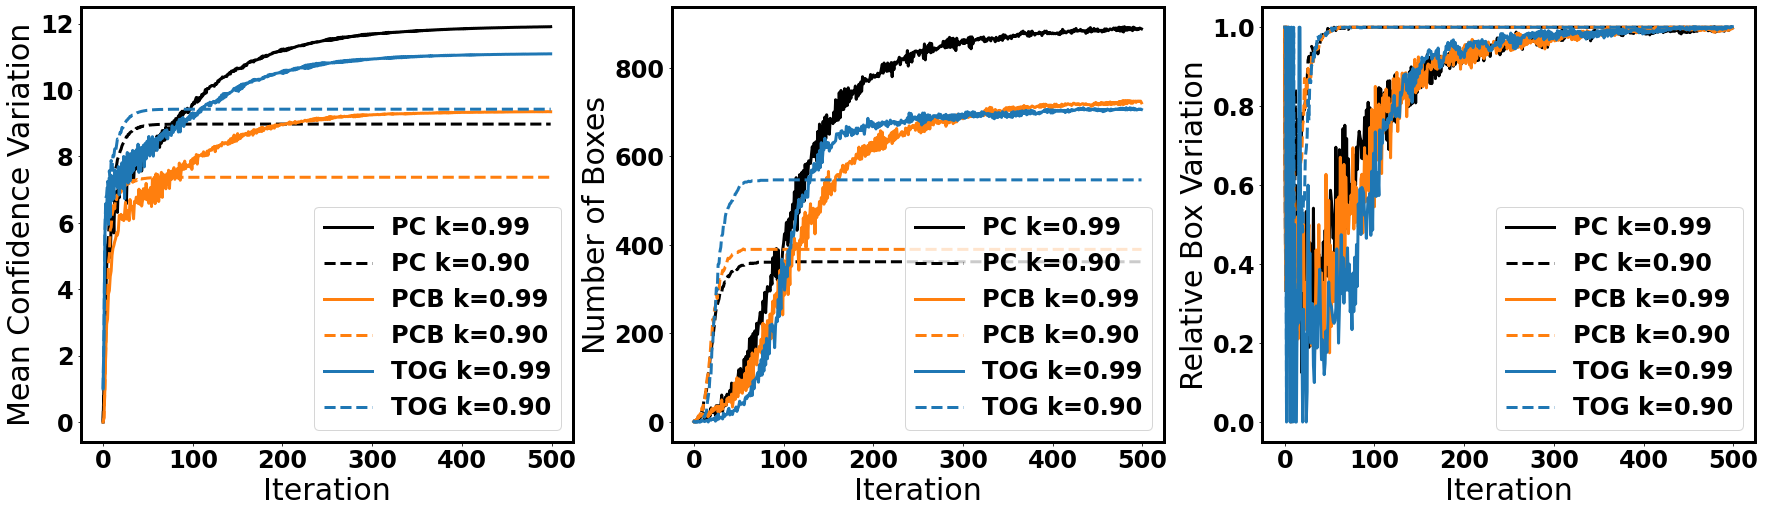

In [400]:
parameters = {'axes.labelsize': 30,
              'axes.linewidth': 3,
              'figure.figsize': (30, 10),
              'font.size': 24,
              'font.weight' : 'bold',
              'axes.prop_cycle': my_cycler
             }

plt.rcParams.update(parameters)

f, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)

f.set_figheight(8)
f.set_figwidth(30)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Mean Confidence Variation')

for idx, d in enumerate(loss_function_conf):
        ax1.plot(d[:MAX_DATA], linewidth = 3, label = legend_labels[idx], linestyle=linestyle[idx])

ax1.legend(loc="lower right")
        
# plt.subplot(1, 3, 2)

ax2.set_xlabel('Iteration')

ax2.set_ylabel('Number of Boxes')

for idx, box in enumerate(loss_function_boxes):
        ax2.plot(box[:MAX_DATA], linewidth = 3, label = legend_labels[idx], linestyle=linestyle[idx])

ax2.legend(loc="lower right")

# plt.subplot(1, 3, 3)

ax3.set_xlabel('Iteration')

ax3.set_ylabel('Relative Box Variation')

for idx, d in enumerate(loss_function_var):
    ax3.plot(d[:MAX_DATA], linewidth = 3, label=legend_labels[idx], linestyle=linestyle[idx])

ax3.legend(loc="lower right")    

plt.show()

In [401]:
f.savefig("loss", bbox_inches='tight', pad_inches=0)